<a href="https://colab.research.google.com/github/raichanpragati/Chat-App/blob/main/Sentiment_Analysis_Amazon_Alexa_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Dataset**

In [2]:
import numpy as np
import pandas as pd
import sklearn
df=pd.read_table('/content/Sentiment-Analysis-using-SVM/amazon_alexa.tsv')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df['rating'].value_counts()

,count
rating,
5,2286
4,455
1,161
3,152
2,96


In [5]:
df.shape

(3150, 5)

**Preprocessing data**

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
stop_words = stopwords.words('english')

In [8]:
len(stop_words)

179

In [9]:
negative_words=['no','not',"don't","aren't","couldn't","didn't","doesn't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","shouldn't","wasn't","weren't","won't","wouldn't"]
for negative_word in negative_words:
  stop_words.remove(negative_word)

len(stop_words)

160

In [10]:
import re             # re -> regular expressions
REPLACE_BY_SPACE_RE = re.compile('[/(){}—[]|@,;‘?|।!-॥–’-]')

def clean_text(sample):
  sample = sample.lower()
  sample = sample.replace("<br /><br />", "")
  sample = REPLACE_BY_SPACE_RE.sub(' ', sample)
  sample = re.sub("[^a-z]+", " ", sample)
  sample = sample.split(" ")
  sample = [word for word in sample if word not in stop_words ]
  sample = " ".join(sample)
  return sample


In [11]:
def clean_text(sample):
    if isinstance(sample, str):  # Check if the input is a string
        sample = sample.lower()
        sample = sample.replace("<br /><br />", "")
        sample = REPLACE_BY_SPACE_RE.sub(' ', sample)
        return sample.strip()
    return ""  # Return an empty string for non-string inputs


In [12]:
df['verified_reviews'] = df['verified_reviews'].apply(clean_text)
conditions = [
    (df['rating'] >= 4),
    (df['rating'] == 3),
    (df['rating'] <= 2)
    ]
values = ['Positive', 'Neutral', 'Negative']
df['sentiment'] = np.select(conditions, values)
df.head()

,rating,date,variation,verified_reviews,feedback,sentiment
0,5,31-Jul-18,Charcoal Fabric,love my echo!,1,Positive
1,5,31-Jul-18,Charcoal Fabric,loved it!,1,Positive
2,4,31-Jul-18,Walnut Finish,"sometimes while playing a game, you can answer...",1,Positive
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing. my 4 ...,1,Positive
4,5,31-Jul-18,Charcoal Fabric,music,1,Positive


from matplotlib import pyplot as plt
_df_11['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_12.groupby('variation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_13.groupby('verified_reviews').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('variation')):
  _plot_series(series, series_name, i)
  fig.legend(title='variation', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('verified_reviews')):
  _plot_series(series, series_name, i)
  fig.legend(title='verified_reviews', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_16.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('variation')):
  _plot_series(series, series_name, i)
  fig.legend(title='variation', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('verified_reviews')):
  _plot_series(series, series_name, i)
  fig.legend(title='verified_reviews', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_18['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['verified_reviews'].value_counts()
    for x_label, grp in _df_19.groupby('variation')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('variation')
_ = plt.ylabel('verified_reviews')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['variation'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='rating', y='variation', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['verified_reviews'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='rating', y='verified_reviews', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: xlabel='sentiment'>

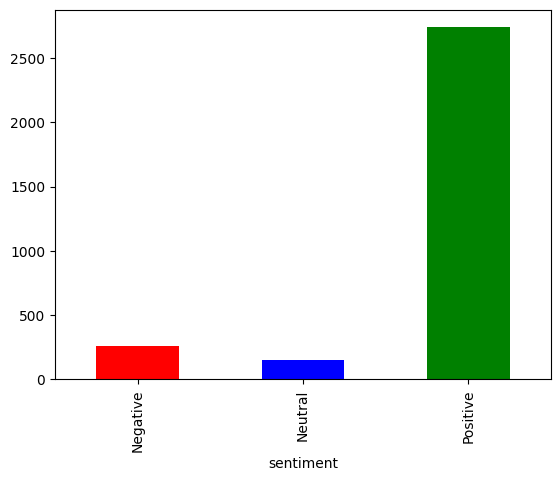

In [13]:
import matplotlib.pyplot as plt
df['sentiment'].value_counts().sort_index().plot.bar(color=['red', 'blue', 'green'])

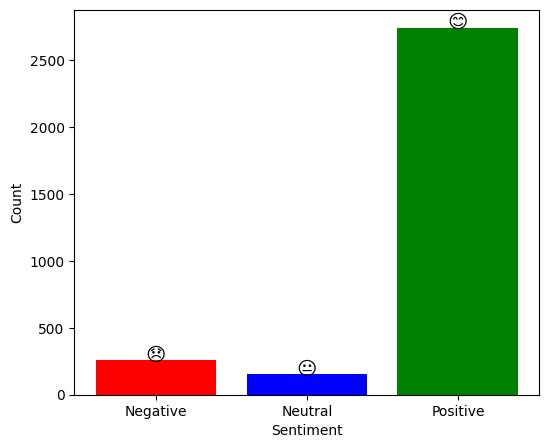

In [55]:
import matplotlib.pyplot as plt

# Define a mapping for sentiments to emojis
emoji_mapping = {
    'Positive': '😊',
    'Neutral': '😐',
    'Negative': '😞'
}

# Get the sentiment counts
sentiment_counts = df['sentiment'].value_counts().sort_index()

# Create a list of emojis for each sentiment category
emojis = [emoji_mapping[sentiment] for sentiment in sentiment_counts.index]

# Create a bar plot
plt.figure(figsize=(6, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'blue', 'green'])

# Add emojis to the bars
for i, sentiment in enumerate(sentiment_counts.index):
    plt.text(i, sentiment_counts.values[i] + 0.1, emojis[i], ha='center', fontsize=14)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
#plt.title('Sentiment Distribution with Emojis')
plt.show()


In [14]:
conditions = [
    (df['rating'] >= 4),
    (df['rating'] == 3),
    (df['rating'] <= 2)
]

values = ['Positive', 'Neutral', 'Negative']
df['sentiment'] = np.select(conditions, values)

# Add emojis to sentiment
emoji_mapping = {
    'Positive': '😊',
    'Neutral': '😐',
    'Negative': '😞'
}
df['emoji_sentiment'] = df['sentiment'].map(emoji_mapping)


**Splitting the Dataset**

In [56]:
x = df['verified_reviews'].values
y = df['sentiment'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0,stratify = y)


In [57]:
np.unique(y_train,return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array([ 205,  122, 2193]))

In [58]:
np.unique(y_test,return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array([ 52,  30, 548]))

**Pipeline**

*   Vectorization using TFIDF Vectorizer
*   Calling SVM Algorithm

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
text_model = Pipeline([('tfidf',TfidfVectorizer()),('model',SVC())])

In [19]:
text_model.fit(x_train,y_train)
y_pred = text_model.predict(x_test)
np.unique(y_pred,return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array([  9,   7, 614]))

**Model Evaluation**

In [50]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_pred,y_test)*100

89.52380952380953

In [21]:
confusion_matrix(y_pred,y_test)

array([[  9,   0,   0],
       [  0,   7,   0],
       [ 43,  23, 548]])

In [22]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.17      1.00      0.30         9
     Neutral       0.23      1.00      0.38         7
    Positive       1.00      0.89      0.94       614

    accuracy                           0.90       630
   macro avg       0.47      0.96      0.54       630
weighted avg       0.98      0.90      0.93       630



In [23]:
text_model.predict(['This product is amazing!'])

array(['Positive'], dtype=object)

In [24]:
import joblib
joblib.dump(text_model,'Sentiment_Analyser')

['Sentiment_Analyser']

**Create Web App**

In [25]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [26]:
!pip install htbuilder

  Preparing metadata (setup.py) ... done
  Created wheel for htbuilder: filename=htbuilder-0.7.0-py3-none-any.whl size=12460 sha256=0f36efe534c53dc6606f24295d7dcc9f959d26cf4121984f15d9f4c867d7c093
  Stored in directory: /root/.cache/pip/wheels/67/22/5e/c417ce5f83c8c315ed4682123a5d627d18e10ee205ef21c4ff
Successfully built htbuilder


In [27]:
%%writefile app.py
import streamlit as st
import sklearn
import joblib

model = joblib.load('Sentiment_Analyser')
st.title('Sentiment Analyser')
ip = st.text_input('Enter your review: ')
op = model.predict([ip])
ans=op[0]
if st.button('Predict'):
  if ans == 'Positive':
      st.success("Positive :)")
  elif ans == 'Negative':
      st.error("Negative :(")
  elif ans== 'Neutral':
      st.warning("Neutral :|")

Writing app.py


In [28]:
!nohup streamlit run app.py &


nohup: appending output to 'nohup.out'


In [29]:
import joblib

# Save the trained model
joblib.dump(text_model, 'Sentiment_Analyser')


['Sentiment_Analyser']

In [30]:
pip install streamlit


In [31]:
!nohup streamlit run app.py &


nohup: appending output to 'nohup.out'


In [32]:
!nohup streamlit run app.py &
url=ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


ERROR:pyngrok.process:t=2024-12-16T22:41:03+0000 lvl=eror msg="failed to auth" obj=tunnels.session err="Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"



PyngrokNgrokError: The ngrok process errored on start: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [33]:
!pip install pipreqs --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.3/798.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.12.3 which is incompatible.


In [34]:
!pipreqs /content

INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/requirements.txt


In [36]:
pip install emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.2 MB/s eta 0:00:00


In [40]:
import streamlit as st
import joblib

# Load the trained model
model = joblib.load('Sentiment_Analyser')

# Title for the app
st.title('Sentiment Analyzer with Emojis')

# Input field for the user to enter a review
ip = st.text_input('Enter your review: ')

# Predict sentiment using the model
if st.button('Predict'):
    op = model.predict([ip])
    ans = op[0]

    # Display sentiment result with emojis
    if ans == 'Positive':
        st.success(f"Positive 😊")
    elif ans == 'Negative':
        st.error(f"Negative 😞")
    elif ans == 'Neutral':
        st.warning(f"Neutral 😐")


2024-12-16 22:48:57.454 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-16 22:48:57.456 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-16 22:48:57.458 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-16 22:48:57.461 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-16 22:48:57.463 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-16 22:48:57.464 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-16 22:48:57.466 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-16 22:48:57.467 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [43]:
import streamlit as st
import joblib

# Load the trained model
model = joblib.load('Sentiment_Analyser')

# Define emoji mapping for sentiments
emoji_mapping = {
    'Positive': '😊',
    'Negative': '😞',
    'Neutral': '😐'
}

# Title for the app
st.title('Sentiment Analyzer with Emojis')

# Input field for the user to enter a review
ip = st.text_input('Enter your review: ')

# Predict sentiment using the model
if st.button('Predict'):
    if ip:  # Ensure input is provided
        op = model.predict([ip])
        ans = op[0]  # Make sure 'ans' is set here

        # Display sentiment result with emojis
        if ans == 'Positive':
            st.success(f"Sentiment: Positive {emoji_mapping['Positive']}")
        elif ans == 'Negative':
            st.error(f"Sentiment: Negative {emoji_mapping['Negative']}")
        elif ans == 'Neutral':
            st.warning(f"Sentiment: Neutral {emoji_mapping['Neutral']}")
    else:
        st.warning("Please enter a review to analyze!")


2024-12-16 22:54:31.871 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-16 22:54:31.872 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-16 22:54:31.875 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-16 22:54:31.877 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-16 22:54:31.878 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-16 22:54:31.880 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-16 22:54:31.881 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-16 22:54:31.883 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [44]:
emoji_mapping = {
    'Positive': '😊',
    'Negative': '😞',
    'Neutral': '😐'
}
